In [172]:
# load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [173]:
# read and preview data 
df = pd.read_csv('2013_Data.csv')
df.head()

,psraid,sample,lang,state,cregion,usr,form,sex,q1,marital,...,birth_hisp,race,inc,ql1a,ql2hh,qc1,qc2hh,zipcode,weight,standwt
0,100004,1,1,36,1,S,2,1,2,2,...,,1,6.0,,2,,,14624,2.59375,0.847977
1,100019,1,1,12,3,S,2,2,3,3,...,,1,3.0,,3,,,34471,2.68750,0.878627
2,100035,1,1,36,1,S,1,2,3,1,...,1,1,3.0,2,,,,13126,5.40625,1.767470
3,100040,1,1,21,3,R,2,2,3,1,...,,1,NaN,,2,,,40353,4.06250,1.328157
4,100041,1,1,34,1,S,2,2,3,5,...,,1,3.0,,3,,,7026,1.43750,0.469963


In [153]:
# Isolates Facebook Data
df_facebook = df[['inc','marital','sex','q1','q2c','q2j','q11d','sns2e','age']]

In [154]:
# Removes Data with Blanks
IndexesToRemove = []
def clean_data(df, smcol):
    index = 0
    sm_index = 0
    for column in df[smcol]:
        if column == " ":
            IndexesToRemove.append(sm_index)
            sm_index += 1
        else:
            sm_index += 1
    WithoutDuplicates = []
    [WithoutDuplicates.append(x) for x in IndexesToRemove if x not in WithoutDuplicates]
    df = df.drop(df.index[WithoutDuplicates])
    IndexesToRemove.clear()
    return df

In [155]:
# Controlling For external Factors part 1
df_fb = clean_data(df_facebook,'sns2e')
print(df_fb['marital'].value_counts())
sum = df_fb['marital'].value_counts().sum()

# breakdown of Marital Status Within the Dataframe
print(str(round((496/sum), 2)) + " Are Married")
print(str(round((217/sum), 2)) + " Never Been Married")
print(str(round((95/sum), 2)) + " Divorced")
print(str(round((78/sum), 2)) + " Living With Partner")
print(str(round((48/sum), 2)) + " Widowed")
print(str(round((2/sum), 2)) + " NA")

1    496
6    217
3     95
2     78
5     48
4     24
9      2
Name: marital, dtype: int64
0.52 Are Married
0.23 Never Been Married
0.1 Divorced
0.08 Living With Partner
0.05 Widowed
0.0 NA


In [156]:
# Makes Seperate Dataframes According to How Much a User uses Facebook
import collections
def snsCategories(df,val,sns):
    return df.loc[df[sns] == val]
several = snsCategories(df_fb,"1","sns2e")
onceaday = snsCategories(df_fb,"2","sns2e")
threetofive = snsCategories(df_fb,"3","sns2e")
onetotwo = snsCategories(df_fb,"4","sns2e")
everyfewweeks = snsCategories(df_fb,"5","sns2e")
lessoften = snsCategories(df_fb,"6","sns2e")

In [157]:
# Breaks down Each Usage Category by age demographics
early_several = several.query("age>=18" and "age<=34")
earlymiddle_several = several.query("age>=35" and "age<=44")
middle_several = several.query("age>=45" and "age<=64")
late_several = several.query("age>=65")
severalbyage = [early_several, earlymiddle_several, middle_several, late_several]
severalbyage[0]

,inc,marital,sex,q1,q2c,q2j,q11d,sns2e,age
62,NaN,6,1,3,3,2,1,1,18
101,9.0,6,2,2,4,4,2,1,18
114,3.0,6,2,4,2,3,2,1,30
172,1.0,2,2,4,2,3,2,1,25
210,5.0,6,1,2,4,4,3,1,23
...,...,...,...,...,...,...,...,...,...
1751,1.0,6,2,2,1,3,1,1,28
1784,2.0,1,2,3,3,2,2,1,29
1786,7.0,6,1,2,1,2,4,1,19
1793,6.0,6,2,2,2,4,1,1,25


In [158]:
# Breaks down Each Usage Category by age demographics
early_onceaday = onceaday.query("age>=18" and "age<=34")
earlymiddle_onceaday = onceaday.query("age>=35" and "age<=44")
middle_onceaday = onceaday.query("age>=45" and "age<=64")
late_onceaday = onceaday.query("age>=65")
onceadaybyage =[early_onceaday, earlymiddle_onceaday, middle_onceaday, late_onceaday]
onceadaybyage[1].describe()

,inc,marital,sex,q1,q2c,q2j,q11d,age
count,103.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,5.135922,3.115044,1.433628,2.575221,2.221239,3.274336,2.920354,30.743363
std,2.364146,2.266811,0.497783,1.015991,0.903708,0.956629,1.225777,7.737638
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000
25%,3.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,24.000000
50%,5.000000,2.000000,1.000000,3.000000,2.000000,3.000000,3.000000,30.000000
75%,7.000000,6.000000,2.000000,3.000000,3.000000,4.000000,4.000000,37.000000
max,9.000000,6.000000,2.000000,5.000000,4.000000,8.000000,8.000000,44.000000


In [159]:
# Breaks down Each Usage Category by age demographics
early_threetofive = threetofive.query("age>=18" and "age<=34")
earlymiddle_threetofive = threetofive.query("age>=35" and "age<=44")
middle_threetofive = threetofive.query("age>=45" and "age<=64")
late_threetofive = threetofive.query("age>=65")
threetofivebyage =[early_threetofive, earlymiddle_threetofive, middle_threetofive, late_threetofive]
threetofivebyage[0].describe()

,inc,marital,sex,q1,q2c,q2j,q11d,age
count,27.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,4.074074,4.030303,1.515152,2.606061,2.090909,2.757576,2.848485,24.818182
std,2.479546,2.242834,0.507519,1.197377,0.722999,0.791766,1.481579,5.071086
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,21.000000
50%,4.000000,6.000000,2.000000,3.000000,2.000000,3.000000,2.000000,23.000000
75%,6.000000,6.000000,2.000000,3.000000,3.000000,3.000000,4.000000,29.000000
max,9.000000,6.000000,2.000000,5.000000,3.000000,4.000000,9.000000,34.000000


In [160]:
# Breaks down Each Usage Category by age demographics
early_onetotwo = onetotwo.query("age>=18" and "age<=34")
earlymiddle_onetotwo = onetotwo.query("age>=35" and "age<=44")
middle_onetotwo = onetotwo.query("age>=45" and "age<=64")
late_onetotwo = onetotwo.query("age>=65")
onceadaybyage =[early_onetotwo, earlymiddle_onetotwo, middle_onetotwo, late_onetotwo]
onceadaybyage[0]

,inc,marital,sex,q1,q2c,q2j,q11d,sns2e,age
135,4.0,4,2,3,1,3,4,4,27
145,6.0,4,1,2,3,4,4,4,30
180,6.0,1,1,2,2,4,2,4,34
420,3.0,1,1,2,1,4,2,4,28
430,1.0,6,2,4,1,2,3,4,29
761,6.0,6,2,3,2,4,1,4,30
982,3.0,6,1,4,1,4,4,4,21
1003,8.0,1,1,2,1,3,2,4,25
1014,3.0,6,2,3,3,3,2,4,21
1117,1.0,1,1,5,1,2,4,4,24


In [161]:
# Breaks down Each Usage Category by age demographics
early_everyfewweeks = everyfewweeks.query("age>=18" and "age<=34")
earlymiddle_everyfewweeks = everyfewweeks.query("age>=35" and "age<=44")
middle_everyfewweeks = everyfewweeks.query("age>=45" and "age<=64")
late_everyfewweeks = everyfewweeks.query("age>=65")
everyfewweeksbyage =[early_everyfewweeks, earlymiddle_everyfewweeks, middle_everyfewweeks, late_everyfewweeks]
everyfewweeksbyage[0]

,inc,marital,sex,q1,q2c,q2j,q11d,sns2e,age
87,5.0,6,2,3,1,2,4,5,30
915,2.0,6,1,4,2,2,2,5,20
1124,3.0,1,2,2,2,3,3,5,26
1164,9.0,6,1,1,4,4,4,5,25
1176,6.0,6,2,1,1,3,2,5,19
1182,NaN,6,1,2,3,3,4,5,21
1245,7.0,6,1,2,3,3,4,5,23
1324,1.0,6,1,3,3,4,3,5,21
1345,6.0,1,2,3,3,4,4,5,28
1460,NaN,6,2,1,3,4,2,5,23


In [162]:
# Breaks down Each Usage Category by age demographics
early_lessoften = lessoften.query("age>=18" and "age<=34")
earlymiddle_lessoften = lessoften.query("age>=35" and "age<=44")
middle_lessoften = lessoften.query("age>=45" and "age<=64")
late_lessoften = lessoften.query("age>=65")
lessoftenbyage =[early_lessoften, earlymiddle_lessoften, middle_lessoften, late_lessoften]
lessoftenbyage[0]

,inc,marital,sex,q1,q2c,q2j,q11d,sns2e,age
64,2.0,6,1,2,4,1,4,6,33
158,5.0,1,2,4,4,4,4,6,27
1010,5.0,1,1,2,3,3,4,6,33
1022,8.0,4,1,3,2,2,2,6,32
1087,2.0,1,1,3,1,4,4,6,27
1165,NaN,6,2,3,2,2,2,6,18
1200,6.0,6,1,3,2,3,3,6,30
1217,2.0,1,1,2,1,4,2,6,28
1247,2.0,2,1,4,3,3,4,6,28
1289,4.0,1,2,4,1,3,3,6,26


In [163]:
# Compiled By Converting each query to csv and copying the mean values
ListOfLessOften = [[2.833333333,2.333333333,3.055555556,3],
                   [2.769230769,2.307692308,3.025641026,3.153846154],
                   [2.728571429,2.214285714,2.914285714,3.042857143],
                   [1.050030525,1.043907845,1.724632997,1.71344607]]
ListOfEveryFewWeeks = [[2.133333333,2.4,3.133333333,3.266666667],
                       [2.565217391,2.347826087,3.043478261,3.086956522],
                       [2.363636364,2.477272727,3.227272727,3.113636364],
                       [2.333333333,2.666666667,3.2,3]]
ListOfOneToTwo = [[2.851851852,1.888888889,2.814814815,2.777777778],
                  [2.865384615,1.846153846,2.634615385,2.865384615],
                  [2.694444444,2.101851852,2.87962963,2.935185185],
                  [2.53125,2.875,3.34375,3]]
ListOfThreeToFive = [[2.606060606,2.090909091,2.757575758,2.848484848],
                     [2.469387755,2.224489796,2.93877551,2.816326531],
                     [2.61627907,2.244186047,3.023255814,2.709302326],
                     [2.2,2.4,3.2,3]]
ListOfOnceADay = [[2.578947368,2.276315789,3.342105263,2.894736842],
                  [2.575221239,2.221238938,3.274336283,2.920353982],
                  [2.597014925,2.323383085,3.213930348,2.895522388],
                  [2.423076923,2.653846154,3.346153846,2.730769231]]
ListOfSeveralADay = [[2.459459459,2.283783784,3.067567568,2.641891892],
                     [2.479262673,2.253456221,3.059907834,2.728110599],
                     [2.542319749,2.250783699,3.059561129,2.796238245],
                     [2.542857143,2.285714286,3.171428571,3]]

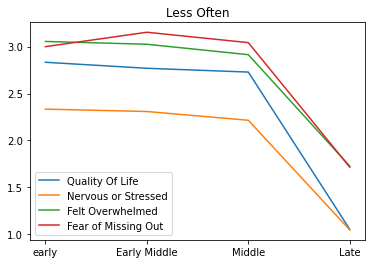

In [164]:
# Plots Data
def plot(category,title):
    LOC = ["early", "Early Middle", "Middle", "Late"]
    qol = [row[0] for row in category]
    nervous = [row[1] for row in category]
    difficulties = [row[2] for row in category]
    fomo = [row[3] for row in category]
    plt.plot(LOC,qol,label = "Quality Of Life")
    #qol 1 (excellent) - 5 (poor)
    plt.plot(LOC, nervous, label = "Nervous or Stressed")
    plt.plot(LOC, difficulties, label = "Felt Overwhelmed")
    plt.plot(LOC, fomo, label = "Fear of Missing Out")
    # 1 (frequent) - 5 (never)
    plt.legend()
    plt.title(title)
plot(ListOfLessOften, "Less Often")

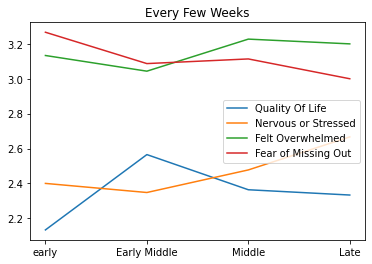

In [165]:
plot(ListOfEveryFewWeeks, "Every Few Weeks")

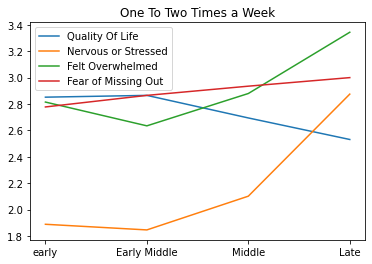

In [166]:
plot(ListOfOneToTwo, "One To Two Times a Week")

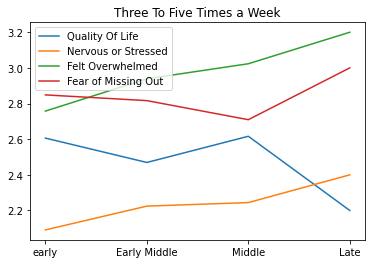

In [167]:
plot(ListOfThreeToFive, "Three To Five Times a Week")

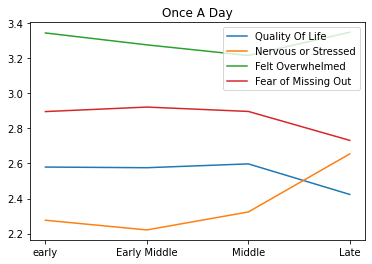

In [168]:
plot(ListOfOnceADay, "Once A Day")

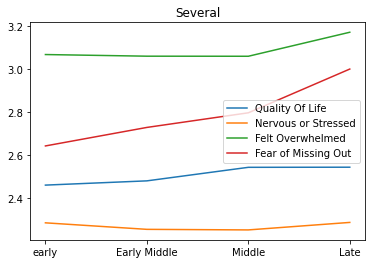

In [169]:
plot(ListOfSeveralADay, "Several")

In [170]:
# Converts Each Category Into A Data Frame
several = pd.DataFrame(several)
onceaday = pd.DataFrame(onceaday)
onetotwo = pd.DataFrame(onetotwo)
threetofive = pd.DataFrame(threetofive)
lessoften = pd.DataFrame(lessoften)


In [171]:
# Replaces Missing Income Values Using A K Nearest Neighbor algorithm and determines how close 
# the average income is to the natinal average.
from sklearn.impute import KNNImputer
def ImputedLessOften(x):
    impute_knn = KNNImputer(n_neighbors = 2)
    lessoften = impute_knn.fit_transform(x)
    return lessoften

def ImputedOnceADay(x):
    impute_knn = KNNImputer(n_neighbors = 2)
    onceaday = impute_knn.fit_transform(x)
    return onceaday

def ImputedOneToTwo(x):
    impute_knn = KNNImputer(n_neighbors = 2)
    onetotwo = impute_knn.fit_transform(x)
    return onetotwo

def ImputedThreeToFive(x):
    impute_knn = KNNImputer(n_neighbors = 2)
    threetofive = impute_knn.fit_transform(x)
    return threetofive

def ImputedSeveral(x):
    impute_knn = KNNImputer(n_neighbors = 2)
    several = impute_knn.fit_transform(x)
    return several
def ImputedEveryFewWeeks(x):
    impute_knn = KNNImputer(n_neighbors = 2)
    EveryFewWeeks = impute_knn.fit_transform(x)
    return EveryFewWeeks

lo = ImputedLessOften(lessoften)
oad = ImputedOnceADay(onceaday)
ott = ImputedOneToTwo(onetotwo)
ttf = ImputedThreeToFive(threetofive)
s = ImputedSeveral(several)
efw = ImputedEveryFewWeeks(everyfewweeks)
def getIncome(category):
    income = category[:, 1]
    print(np.sum(income)/len(income))
    return (np.sum(income)/len(income))

# representative of $30000
AverageIncomeCategory = 3
several_income = float(getIncome(s))
onceaday_income = float(getIncome(oad))
onetotwo_income = float(getIncome(ott))
threetofive_income = float(getIncome(ttf))
lessoften_income = float(getIncome(lo))
everyfewweeks_income = float(getIncome(efw))

def Closeness(AIC, CI):
    return CI / AIC

ClosenessSeveral = Closeness(AverageIncomeCategory,several_income)
ClosenessOAD = Closeness(AverageIncomeCategory,onceaday_income)
ClosenessOTT = Closeness(AverageIncomeCategory,onetotwo_income)
ClosenessTTF = Closeness(AverageIncomeCategory,threetofive_income)
ClosenessLO = Closeness(AverageIncomeCategory,lessoften_income)
ClosenessEFW = Closeness(AverageIncomeCategory, everyfewweeks_income)
print("Income")
print("Several Closeness To Average: " + str(ClosenessSeveral))
print("Once A Day Closeness To Average: " + str(ClosenessOAD))
print("Once To Two Day's Closeness To Average: " + str(ClosenessOTT))
print("Three To Five Day's Closeness To Average: " + str(ClosenessTTF))
print("Less Often's Closeness To Average: " + str(ClosenessLO))
print("Every Few Week's Closeness To Average: " + str(ClosenessEFW))

2.8446327683615817
2.6343612334801763
2.65
2.75
2.4578313253012047
2.4237288135593222
Income
Several Closeness To Average: 0.9482109227871939
Once A Day Closeness To Average: 0.8781204111600588
Once To Two Day's Closeness To Average: 0.8833333333333333
Three To Five Day's Closeness To Average: 0.9166666666666666
Less Often's Closeness To Average: 0.8192771084337349
Every Few Week's Closeness To Average: 0.8079096045197741
